# Heart disease prediction models

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

#### Loading the Data

In [2]:
df=pd.read_csv(r'C:\Users\AAA\Desktop\Projects and Researchs\JiT Research\2021\Heart disease and brain stroke\Heart disease/heart12.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


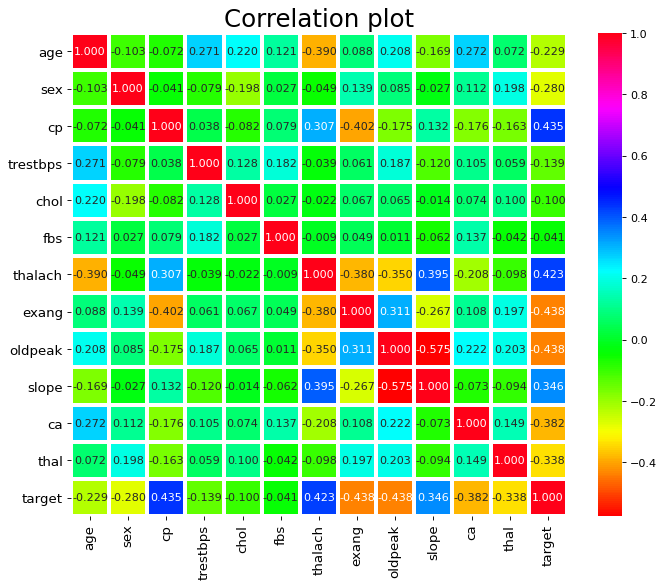

In [4]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)

# Decorations
plt.title('Correlation plot', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Correlation with chest pain

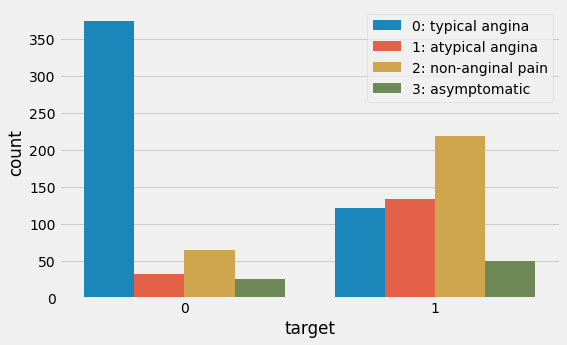

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.countplot(x=df.target,hue=df.cp)
plt.legend(labels=['0: typical angina', '1: atypical angina','2: non-anginal pain','3: asymptomatic'])

In [6]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [7]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,0,1,0,0,0,1,0


In [8]:
X = df.drop(['target'], axis = 1)
y = df.target.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

In [9]:
X.shape

(1025, 19)

# Training & Testing of Model

### 1.XGBoost

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier
alg = XGBClassifier(learning_rate=0.01, n_estimators=2000, max_depth=8,
                        min_child_weight=0, gamma=0, subsample=0.52, colsample_bytree=0.6,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, 
                    seed=27, reg_alpha=5, reg_lambda=2, booster='gbtree',
            n_jobs=-1, max_delta_step=0, colsample_bylevel=0.6, colsample_bynode=0.6)
alg.fit(X_train, y_train)
print('train accuracy',alg.score(X_train, y_train))
print('test accuracy',alg.score(X_test,y_test))

C:\Users\AAA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy 0.926829268292683
test accuracy 0.9219512195121952


In [11]:
import scikitplot as skplt
xgb_prob = alg.predict_proba(X_test)

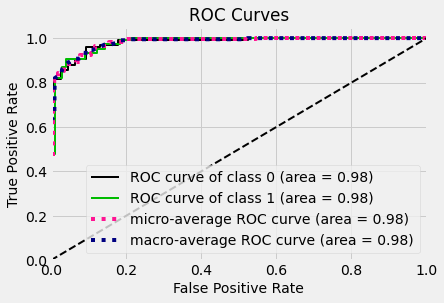

In [12]:
skplt.metrics.plot_roc(y_test, xgb_prob)
plt.show()

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

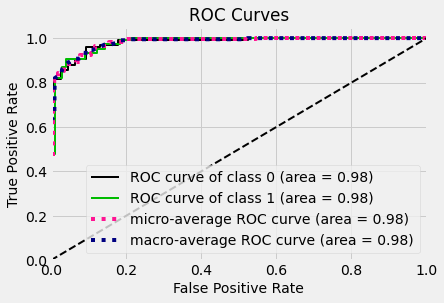

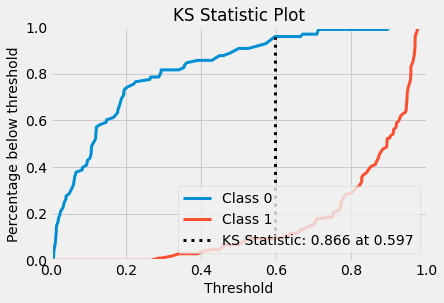

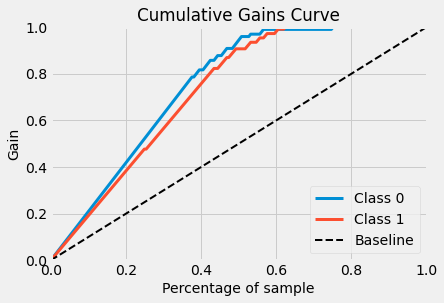

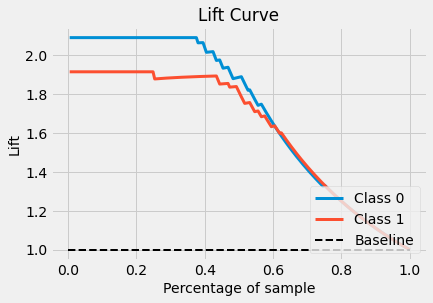

In [13]:
skplt.metrics.plot_roc(y_test, xgb_prob)
skplt.metrics.plot_ks_statistic(y_test, xgb_prob)
skplt.metrics.plot_cumulative_gain(y_test, xgb_prob)
skplt.metrics.plot_lift_curve(y_test, xgb_prob)

C:\Users\AAA\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


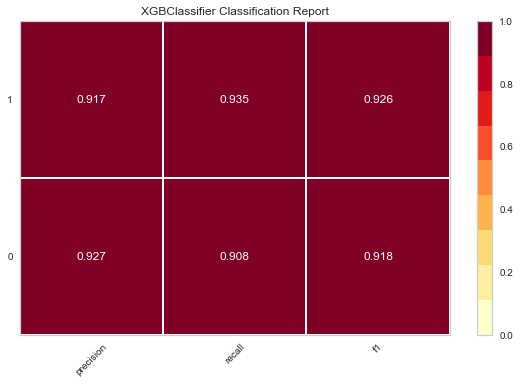

In [14]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
classes=[0,1]
visualizer = ClassificationReport(alg, classes=classes)
#visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

### 2.Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600,random_state=0, n_jobs= -1)
rf = rf.fit(X_train, y_train)
print('train accuracy',rf.score(X_train, y_train))
print('test accuracy',rf.score(X_test,y_test))

train accuracy 1.0
test accuracy 1.0


In [16]:
X_train.shape

(820, 19)

In [17]:
import scikitplot as skplt
rdf_prob = rf.predict_proba(X_test)

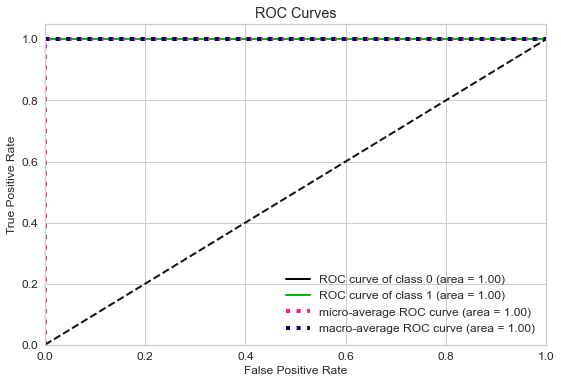

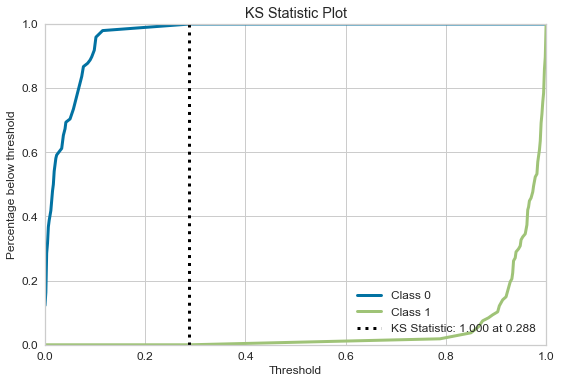

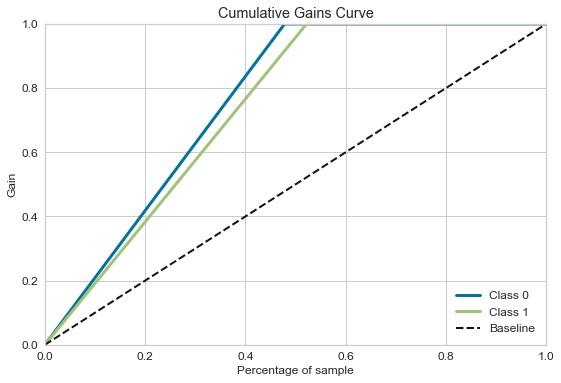

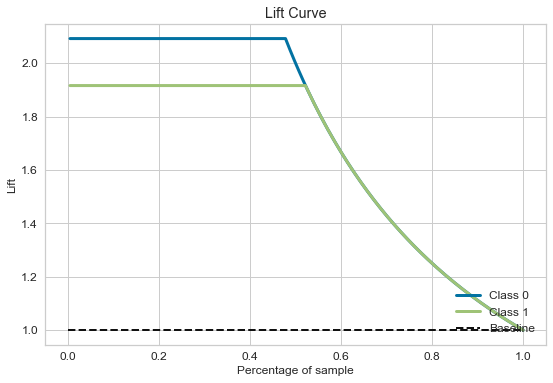

In [18]:
skplt.metrics.plot_roc(y_test, rdf_prob)
skplt.metrics.plot_ks_statistic(y_test, rdf_prob)
skplt.metrics.plot_cumulative_gain(y_test, rdf_prob)
skplt.metrics.plot_lift_curve(y_test, rdf_prob)
plt.show()

C:\Users\AAA\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


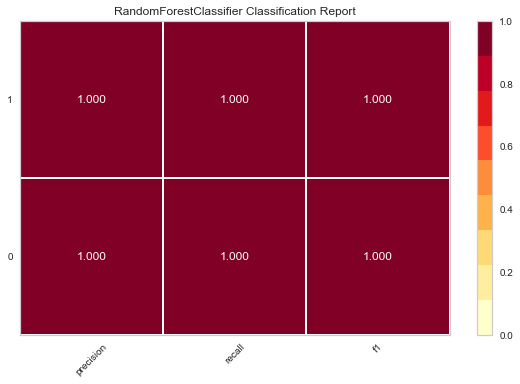

In [19]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix
classes=[0,1]
visualizer = ClassificationReport(rf, classes=classes)
#visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

In [60]:
import pickle
with open('heart12.pkl','wb') as f:
    pickle.dump(rf,f)